# Cloud Reachability and Latency Forecasting with RIPE Atlas
This project is accesible at: https://github.com/rita-imdea/ripe-userguide

## II) Retrieving data from RIPE Atlas

In this notebook, we are going to see how to retrieve measurements fron RIPE Atlas and also how to parse measurements from JSON files (which have been pre-downloaded from RIPE Atlas). 
We recommend the reader to first take a look at the PDF document that contains the guide for the whole course. 

------------------------------
To complete:
!!!!!!!!!!!!!!!!
This notebook is divided in XXX parts.

In [1]:
# Give the Atlas api key an easy to remember variable name 
ATLAS_API_KEY = " "

In [2]:
import requests # to create http requests from Python
import json # Library to write and ready JSON files in PYthon

### A) ACCESSING PUBLICLY AVAILABLE MEASUREMENTS

Retrieving data from the RIPE Atlas database in Python is very simple. 
One only needs to know the ID that indentifies the measurement. Then, it is enough to run the following code.
The id provided is a ramdom id measurement that you can substitute with your measurement's ids if you create customized measurements. 

First, we set the IDs of the measurements we want to retrieve.

In [3]:
# Set the measurement IDs you want to retrieve
measurement_ids = ["61142052"] # example of measurement ID # example of measurement ID


Now, for each measurement, we save the data in a json file.

In [4]:

# Loop through the measurement IDs and retrieve the JSON files
for measurement_id in measurement_ids:
        url = f"https://atlas.ripe.net/api/v2/measurements/{measurement_id}/results/?format=json"
        headers=f""
        response = requests.get(url, headers=headers)

        # Check if the request was successful
        if response.status_code == 200:
                json_data = response.json()
                
                measurement_file = f"RIPE-Atlas-measurement-{measurement_id}.json" # Name of the JSON file where the data will be stored. 
                
                # Write the JSON data to a file
                with open(measurement_file, "w") as f:
                        json.dump(json_data, f, indent=4)
                        
        else:
                print(f"Failed to retrieve measurement {measurement_id}. Error code: {response.status_code}")


### B) PARSING YOUR MEASUREMENTS

Next, we are going to get the data from the JSON files (which can be already present in the course directory or could be obtained with the above code). The next steps are:

1. Initially, we parse the JSON files and store the data in a Python structure. 
2. We clean the data

-----------------------------------------

!!!!!!!!!!!!!!!! To complete

3. Finally you can plot the probability distribution to see how the data is spread 

First, we set the IDs of the measurements we are interested in. 
In this case, the IDs provided below refer to the measurements taken for this course. 

In [5]:
#measurement_ids = ["48819905", "48819907", "48819909"] # example of measurement ID -- PING MEASUREMENTS
#measurement_ids = ["48819906", "48819908", "48819910"] # example of measurement ID -- TRACEROUTE MEASUREMENTS
measurement_ids = ["48819905",  "48819907",  "48819909"] # example of measurement ID


### a) Reading JSON files in Python

Next, we use the Python library "json", which allows us to ready and write JSON files with Python.
Furthermore, we use two of the most used packages for data processing in PYthon: Pandas and Numpy. 

1. Pandas is a Python library that provides a data structure called a DataFrame (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), which is a structure that facilitates data processing and manipulation. We shall use it to parse our data because it provides a number of useful functions for manipulation and visualization of data.

2. Numpy is a Python library that facilitates mathematical operations, in particular for arrays and matrices. 

In [6]:
# We first import the necessary libraries 
import pandas as pd
import numpy  as np
from datetime import datetime

For each one of the measurements, we read the JSON file and store it in a pandas DataFrame (df) structure.

Then, we create a list of DataFrames (df) with all the measurements. 

In [7]:
# Loop through the measurement IDs experiment files and create a DataFrame for each
dfs = []
for measurement_id in measurement_ids:
    # Read the JSON data from the file
    with open(f"RIPE-Atlas-measurement-{measurement_id}.json", "r") as f:
        json_data = json.load(f)
    
    # Normalize the JSON data into a pandas DataFrame
    df = pd.json_normalize(json_data)
    
    # Append the DataFrame to the list of DataFrames
    dfs.append(df)


We would like to have all the DataFrames together to analyze all the measurements at the same time. Thus, we concatenate the list of dataframes

In [8]:
# Concatenate all the DataFrames into a single one
result_df = pd.concat(dfs, ignore_index=True)

We can visualize the current data structure thanks to the pandas function "head", which prints the first 5 rows of the DataFrame with the value of all the columns.

In [9]:
# Print the resulting DataFrame
result_df.head()

,fw,mver,lts,dst_name,af,dst_addr,src_addr,proto,ttl,size,...,avg,msm_id,prb_id,timestamp,msm_name,from,type,group_id,step,stored_timestamp
0,5040,2.4.1,14,52.46.72.50,4,52.46.72.50,10.18.246.209,ICMP,234.0,64,...,14.612530,48819905,1003454,1673864005,Ping,51.15.99.8,ping,48819905,300,1673864050
1,5040,2.4.1,20,52.46.72.50,4,52.46.72.50,10.109.0.30,ICMP,233.0,64,...,24.125096,48819905,1003747,1673864003,Ping,45.137.88.145,ping,48819905,300,1673864114
2,5080,2.6.2,96,52.46.72.50,4,52.46.72.50,192.168.250.65,ICMP,233.0,64,...,22.542065,48819905,20757,1673863991,Ping,82.116.160.225,ping,48819905,300,1673864089
3,5080,2.6.2,12,52.46.72.50,4,52.46.72.50,192.168.1.38,ICMP,234.0,64,...,26.183208,48819905,53229,1673864019,Ping,83.54.157.101,ping,48819905,300,1673864090
4,5080,2.6.2,33,52.46.72.50,4,52.46.72.50,192.168.0.101,ICMP,232.0,64,...,171.458986,48819905,51381,1673864074,Ping,102.34.0.4,ping,48819905,300,1673864205


### b) Data cleaning and pre-processing

The following step is to clean the data collection. 

For that, we should first know that the RIPE Atlas measurements may include negative values for latency (-1.0), which represent samples for which it was not possible to store the value (Due to, for example, timeouts in the netowrk protocols). 


In [10]:
## Cleaning the data 

# Change them to NaN
result_df['avg'].replace(-1.0, np.nan, inplace=True)

# Remove Null values 
result_df = result_df.dropna(how='any',axis=0) 
result_df.shape


(17119, 26)

To avoid that these values impact the later analysis, we remove those samples. We first transform the negative values into Not-a-Number values (NaN), and we make use of the function "dropna" from Pandas library to remove those samples.  

We further pre-process the data to facilitate the plotting, visualization and readability of the data.

For that, we change the probe ID with an acronym that represents the country where the probe is located, plus an index in case there are several probes in the same country. 

In [11]:
# Renaming the probe_id column for easy plotting 
nprb_id = []

for value in result_df["prb_id"]:
    if value == 1004991:
        nprb_id.append('es1')
    if value == 53229:
        nprb_id.append('es2')
    if value == 1004997:
        nprb_id.append("pt1")
    if value == 1004102:
        nprb_id.append("pt2")
    if value == 20757:
        nprb_id.append("es3")
    if value ==1003454:
        nprb_id.append("nl1")
    if value == 1003158:
        nprb_id.append("nl2")
    if value == 1003747:
        nprb_id.append("nl3")
    if value == 1004200:
        nprb_id.append("es4")
    if value == 51381:
        nprb_id.append("ug1")
    if value == 54470:
        nprb_id.append("us1")
    if value == 1002914:
        nprb_id.append("us2")
        
result_df["nprb_id"] = nprb_id



In [12]:
# Changing the time column from epoch to date time format for time series processing
from datetime import datetime

new_timestamp = []

for i in result_df['timestamp']:
    my_datetime = datetime.fromtimestamp(i)
    new_timestamp.append(my_datetime)

result_df = result_df.copy()
result_df['new_time'] = new_timestamp
result_df.head()

,fw,mver,lts,dst_name,af,dst_addr,src_addr,proto,ttl,size,...,prb_id,timestamp,msm_name,from,type,group_id,step,stored_timestamp,nprb_id,new_time
0,5040,2.4.1,14,52.46.72.50,4,52.46.72.50,10.18.246.209,ICMP,234.0,64,...,1003454,1673864005,Ping,51.15.99.8,ping,48819905,300,1673864050,nl1,2023-01-16 11:13:25
1,5040,2.4.1,20,52.46.72.50,4,52.46.72.50,10.109.0.30,ICMP,233.0,64,...,1003747,1673864003,Ping,45.137.88.145,ping,48819905,300,1673864114,nl3,2023-01-16 11:13:23
2,5080,2.6.2,96,52.46.72.50,4,52.46.72.50,192.168.250.65,ICMP,233.0,64,...,20757,1673863991,Ping,82.116.160.225,ping,48819905,300,1673864089,es3,2023-01-16 11:13:11
3,5080,2.6.2,12,52.46.72.50,4,52.46.72.50,192.168.1.38,ICMP,234.0,64,...,53229,1673864019,Ping,83.54.157.101,ping,48819905,300,1673864090,es2,2023-01-16 11:13:39
4,5080,2.6.2,33,52.46.72.50,4,52.46.72.50,192.168.0.101,ICMP,232.0,64,...,51381,1673864074,Ping,102.34.0.4,ping,48819905,300,1673864205,ug1,2023-01-16 11:14:34


In [13]:
country_name = []

for value in result_df["nprb_id"]:
    if (value == 'es1') or (value == 'es2') or(value == 'es3') or( value == 'es4'):
        country_name.append('Spain')
    if(value == 'nl1') or (value == 'nl2')or (value == 'nl3'):
        country_name.append('Netherlands')
    if(value == 'pt1') or (value == 'pt2'):
        country_name.append('Portugal')
    if(value == 'us1') or (value == 'us2'):
        country_name.append('USA')
    if(value == 'ug1'):
        country_name.append('Uganda')
        
result_df['country_name'] = country_name


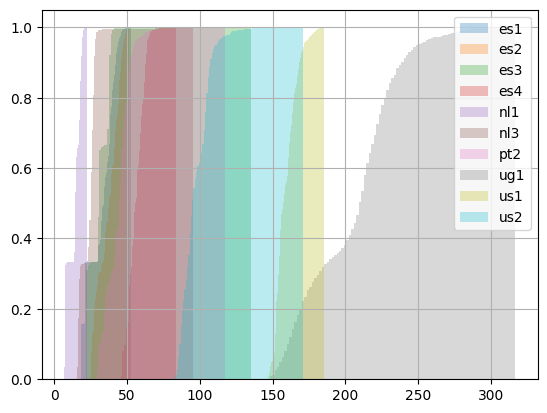

In [14]:
# Plotting the probability distribution
# checking cdf for each of the probes
probes = ['es1','es2','es3','es4','nl1','nl3','pt2','ug1','us1','us2']

for probe in probes:
    df_cdf = result_df[(result_df['nprb_id'] == probe)]
    axx = df_cdf['avg'].hist(cumulative=True, density=True, bins=100, alpha = 0.3)
axx.legend(probes)

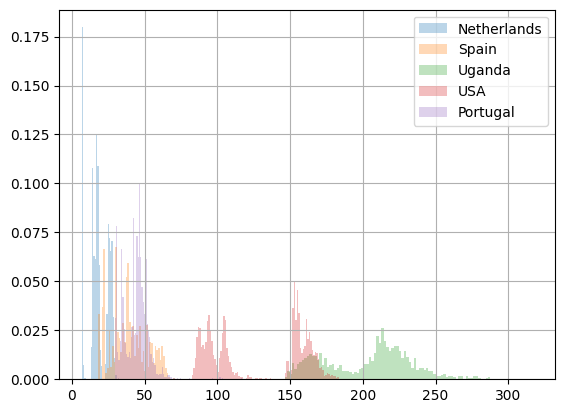

In [15]:
#checking pdf for each of the probes
countries = result_df['country_name'].unique()

for country in countries:
    df_pdf = result_df[(result_df['country_name'] == country)]
    axx = df_pdf['avg'].hist(density=True, bins=100, alpha = 0.3)

axx.legend(countries)

#### C) ANALYZING YOUR MEASUREMENTS 

1. First you do some feature engineering ie add features that may be missing but could be important like distance and probe status 
2. Check how latency varies over time, how mean and standard deviation vary over distance or any other interesting scenarios you can come up with 
3. Finally you can do some predictions based using established mathematical models or machine learning models and see what gives you best results.  

In [16]:
# Feature Engineering 
# Obtaining the distance 

#Getting all the ripe atlas probes
probe_id_list = result_df['prb_id'].unique()

#Getting all the destination ip addresses
dest_ip_list = result_df['dst_addr'].unique()

# Collect the source probe latitude/longitude information from ripe atlas 
from ripe.atlas.cousteau import Probe 
probe_coordinates = []
probe_country = []

for id_i in probe_id_list:
    probe = Probe(id=id_i) # Obtains all metadata of probe id_i
    #print(probe.geometry) #probe.geometry is a GeoJSON https://en.wikipedia.org/wiki/GeoJSON
    probe_coordinates.append(probe.geometry['coordinates']) # saving to the list
    probe_country.append(probe.country_code)

longitude = []
latitude = []

for i in probe_coordinates:
    longitude.append(i[0])
    latitude.append(i[1])

# create a probe metadata dataframe
srcprobes_df = pd.DataFrame({'prb_id': probe_id_list,'longitude': longitude, 'latitude': latitude,'probe_country': probe_country})
srcprobes_df

,prb_id,longitude,latitude,probe_country
0,1003454,4.8995,52.3695,NL
1,1003747,4.3695,51.8505,NL
2,20757,-1.9805,43.2905,ES
3,53229,-5.5915,42.6115,ES
4,51381,32.5615,0.2575,UG
5,54470,-122.0795,37.3875,US
6,1002914,-73.9625,40.6495,US
7,1004102,-8.6225,41.2285,PT
8,1004200,-15.5025,28.0275,ES
9,1004991,-0.9085,41.5975,ES


In [17]:
# Calculate the latitude and longitude of the destination servers
# Create empty lists to store the data
server_ip = []
latitudes = []
longitudes = []

# Query the "ipinfo.io" API for geolocation information
for ip in dest_ip_list:
    response = requests.get(f'https://ipinfo.io/{ip}/json')
    if response.status_code == 200:
        data = response.json()
        latitude, longitude = data.get('loc', '').split(',')
        server_ip.append(ip)
        latitudes.append(latitude)
        longitudes.append(longitude)

# Create a dataframe with the server data . Remeber that this infomation is approximate for privacy reasons
aws_server_df = pd.DataFrame({ 'AWS_Server_ip': server_ip,'latitude': latitudes, 'longitude': longitudes})
aws_server_df

,AWS_Server_ip,latitude,longitude
0,52.46.72.50,48.8534,2.3488
1,54.239.55.167,50.1155,8.6842
2,67.220.226.67,53.3331,-6.2489


In [18]:
# Function to calculate Euclidean distance between two points
distance_data = []
def euclidean_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    return np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2)

# Create an empty dataframe to store distance information
distance_df = pd.DataFrame(columns=['prb_id', 'ip_address', 'distance'])

# Calculate Euclidean distances between all probes and AWS servers
for index_probe, row_probe in srcprobes_df.iterrows():
    for index_aws, row_aws in aws_server_df.iterrows():
        distance = euclidean_distance(float(row_probe['latitude']), float(row_probe['longitude']), float(row_aws['latitude']), float(row_aws['longitude']))
        distance_data.append({
            'prb_id': row_probe['prb_id'],
            'aws_ip_address': row_aws['AWS_Server_ip'],
            'distance': distance})
        
# Create a DataFrame from the list of distance information
distance_df = pd.DataFrame(distance_data)
len(distance_df)

30

In [19]:
#adding a distance column to the result_df
analysis_df  = pd.merge(result_df,distance_df, left_on=['prb_id', 'dst_addr'], right_on=['prb_id', 'aws_ip_address'], how='inner')
analysis_df.tail()

,fw,mver,lts,dst_name,af,dst_addr,src_addr,proto,ttl,size,...,from,type,group_id,step,stored_timestamp,nprb_id,new_time,country_name,aws_ip_address,distance
17114,5080,2.6.2,113,67.220.226.67,4,67.220.226.67,192.168.1.179,ICMP,215.0,64,...,73.231.179.223,ping,48819909,300,1674035499,us1,2023-01-18 10:50:10,USA,67.220.226.67,116.923009
17115,5080,2.6.2,51,67.220.226.67,4,67.220.226.67,192.168.1.179,ICMP,215.0,64,...,73.231.179.223,ping,48819909,300,1674035786,us1,2023-01-18 10:55:12,USA,67.220.226.67,116.923009
17116,5080,2.6.2,50,67.220.226.67,4,67.220.226.67,192.168.1.179,ICMP,215.0,64,...,73.231.179.223,ping,48819909,300,1674036138,us1,2023-01-18 11:00:09,USA,67.220.226.67,116.923009
17117,5080,2.6.2,7,67.220.226.67,4,67.220.226.67,192.168.1.179,ICMP,215.0,64,...,73.231.179.223,ping,48819909,300,1674036378,us1,2023-01-18 11:05:08,USA,67.220.226.67,116.923009
17118,5080,2.6.2,38,67.220.226.67,4,67.220.226.67,192.168.1.179,ICMP,215.0,64,...,73.231.179.223,ping,48819909,300,1674036745,us1,2023-01-18 11:10:08,USA,67.220.226.67,116.923009


In [20]:
# Applying some simple forecasting methods

# Using the naive forecast
result_df = result_df.assign(naive=df['avg'].shift(1))
# Replace NaN at top of value column with 0
result_df['naive'] = result_df['naive'].fillna(method='ffill').fillna(0)

# Testing the prediction accuracy for naive forecast
se = (result_df['avg'] - result_df['naive']) ** 2
mse_naive = se.mean()
mse_naive


6600.60739735334

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Exponential Smoothing'}>

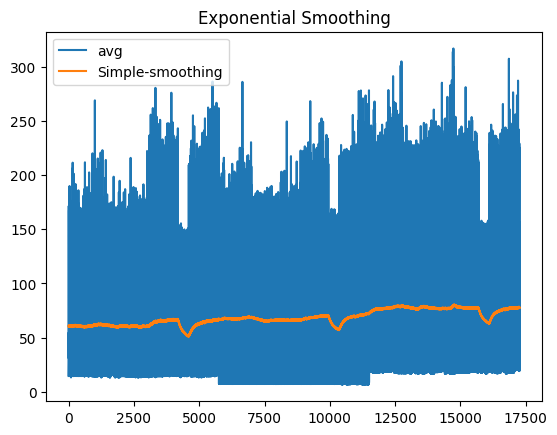

In [21]:
# Exponential smoothing method
from statsmodels.tsa.api import SimpleExpSmoothing
fit1 = SimpleExpSmoothing(result_df['avg']).fit()
result_df['Simple-smoothing'] = SimpleExpSmoothing(result_df['avg']).fit().fittedvalues
result_df[['avg','Simple-smoothing']].plot(title='Exponential Smoothing')

In [22]:
se = (result_df['avg'] - result_df['Simple-smoothing']) ** 2
mse_esm = se.mean()
mse_esm

3718.8278785730954

In [23]:
import itertools
import random

df2 = analysis_df.copy()

test_indices = []
train_indices = []
        
array1 = df2['nprb_id'].unique()
array2 = df2['dst_addr'].unique()

# Creating all possible pairs
pairs = list(itertools.product(array1, array2))

# Randomly selecting 10 pairs
selected_pairs = random.sample(pairs, 10)

# Removing selected pairs from the original list
for pair in selected_pairs:
    pairs.remove(pair)

# Creating separate lists
selected_list = selected_pairs
remaining_list = pairs

train_dfs = []
for i,k in remaining_list:
    temp_df = df2.loc[(df2['nprb_id'] == i) & (df2['dst_addr'] == k)]
            
    # Append the piece to the selected data
    train_dfs.append(temp_df)

train_df = pd.concat(train_dfs)
        
test_dfs = []
for i,k in selected_list:
    temp_df = df2.loc[(df2['nprb_id'] == i) & (df2['dst_addr'] == k)]
            
    # Append the piece to the selected data
    test_dfs.append(temp_df)

test_df = pd.concat(train_dfs)
        

In [24]:
#normalise the rtt values 
train_df['normalizzed_avg'] = (train_df['avg'] - train_df['avg'].mean()) / train_df['avg'].std()
test_df['normalizzed_avg'] = (test_df['avg'] - test_df['avg'].mean()) / test_df['avg'].std()

# normalize the 'distance' column
test_df['normalizzed_distance'] = (test_df['distance'] - train_df['distance'].mean()) / train_df['distance'].mean()
train_df['normalizzed_distance'] = (train_df['distance'] - train_df['distance'].mean()) / train_df['distance'].mean()

In [25]:
# Select your features and target
X_train = train_df['normalizzed_distance'].values.reshape(-1,1)
y_train = train_df['normalizzed_avg'].values

X_test = test_df['normalizzed_distance'].values.reshape(-1,1)
y_test = test_df['normalizzed_avg'].values

# Import the Machine learning libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create a Decision Tree Regressor
model = DecisionTreeRegressor()
# Train the model
model.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.02342222043854152


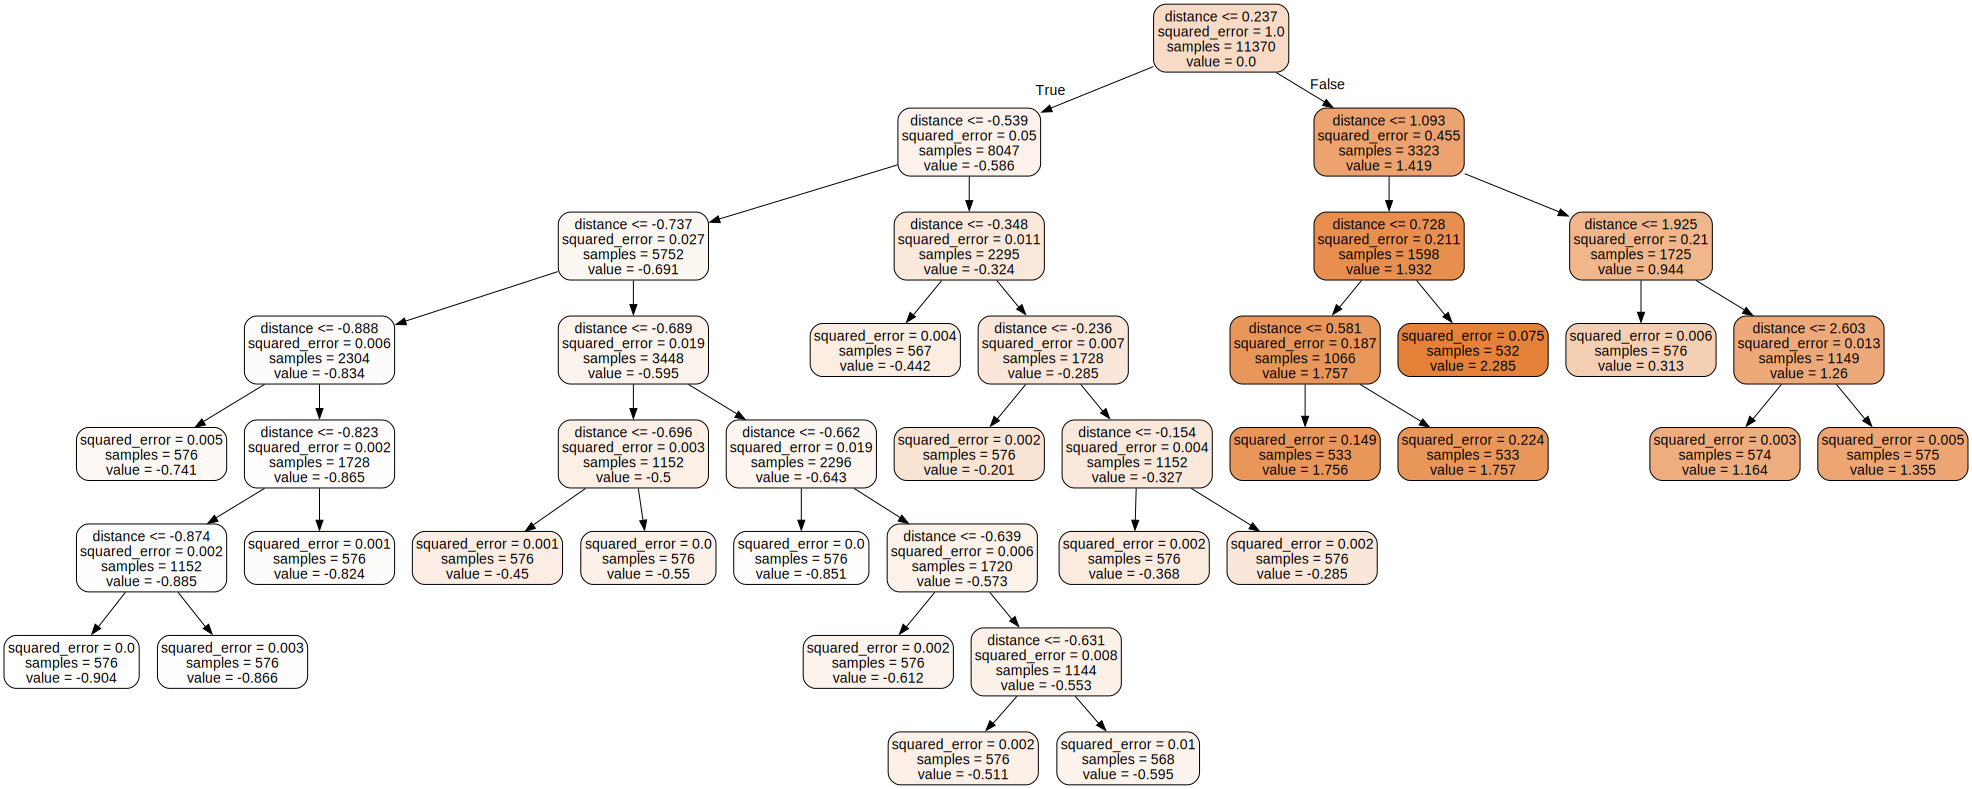

In [26]:
# Viewing the Decision Tree
from sklearn.tree import export_graphviz
import graphviz

tree_dot = export_graphviz(model,feature_names =["distance"],out_file=None,rounded=True, filled=True)

# Visualize the tree using Graphviz
graph = graphviz.Source(tree_dot)
graph

In [27]:
# LSTM Modelling 
# This code is from this tutorial https://www.youtube.com/watch?v=BSpXCRTOLJA
# please watch the tutorial to understand the code better. It explains how to feed your time series data to the LSTM model
import tensorflow as tf
from tensorflow. keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

In [28]:
from numpy import array
def split_sequence(sequence, n_steps):
    X = list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
    # gather input and output parts of the pattern
        seq_x = sequence[i:end_ix]
        X.append(seq_x)
    return array(X)


Xtrain_3d = split_sequence(X_train,10)
Xtest_3d = split_sequence(X_test,10)
Xtrain_3d.shape

(11360, 10, 1)

In [29]:
n_features = 1
Xtrain_3d  = Xtrain_3d .reshape((Xtrain_3d.shape[0], Xtrain_3d.shape[1], n_features))
Xtest_3d = Xtest_3d .reshape((Xtest_3d.shape[0], Xtest_3d.shape[1], n_features))
Xtrain_3d[0].shape

(10, 1)

In [30]:
# define model
n_steps = 10 

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(Xtrain_3d, y_train[0:len(Xtrain_3d)], epochs=20, verbose=0)

2023-10-09 15:23:28.156652: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [31]:
y_pred = model.predict(Xtest_3d, verbose=0)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred,y_test[0:len(y_pred)])
mse

0.032716789328826504

#### D ) LATENCY Vs DISTANCE 
Sample code below helps us see how latency would change depending on the distance and when/if you added servers to deliver the customer services 

In [32]:
# References 

# Install Jupyter-MATLAB
# https://am111.readthedocs.io/en/latest/jmatlab_install.html
# Calling user-defined MATLAB functions from Python
# https://www.mathworks.com/help/matlab/matlab_external/call-user-script-and-function-from-python.html


# Check if python version is 64bit or 32bit
# Then download the corresponding MATLAB version 
# import sys
# print(sys.maxsize > 2**32)

# MATLAB-side configuration
# First Install MATLAB from this website https://www.mathworks.com/
# Get the matlab root directory by running <matlabroot> in the MATLAB command window
# Add the matlabroot/bin to the system path
# export PATH="/Applications/MATLAB_R2019b.app/bin:$PATH"

# SETUP MATLAB ENGINE API FOR PYTHON
# cd /usr/local/MATLAB/R2018a/extern/engines/python -  change to your matlab version
# python setup.py install // change setup tools if this fails pip install setuptools==58.2.0

# JUPYTER SIDE CONFIGURATION 
# python -m matlab_kernel install --user //this adds matlab to the jupyter kernels list
# jupyter kernelspec list //check if matlab is in the list
# pip install matlab.engine

import matlab.engine

# Start a MATLAB session
eng = matlab.engine.start_matlab()
#call the matlab simulation 
eng.PoA_student_workshop(nargout=0)


lambda_set =

  Columns 1 through 7

         0    0.0008    0.0017    0.0025    0.0034    0.0042    0.0051

  Columns 8 through 14

    0.0059    0.0068    0.0076    0.0085    0.0093    0.0102    0.0110

  Columns 15 through 21

    0.0119    0.0127    0.0136    0.0144    0.0153    0.0161    0.0170

  Columns 22 through 28

    0.0178    0.0187    0.0195    0.0204    0.0212    0.0221    0.0229

  Columns 29 through 35

    0.0238    0.0246    0.0255    0.0263    0.0272    0.0280    0.0289

  Columns 36 through 42

    0.0297    0.0306    0.0314    0.0323    0.0331    0.0340    0.0348

  Columns 43 through 49

    0.0357    0.0365    0.0374    0.0382    0.0391    0.0399    0.0408

  Columns 50 through 56

    0.0416    0.0425    0.0433    0.0442    0.0450    0.0459    0.0467

  Columns 57 through 63

    0.0476    0.0484    0.0493    0.0501    0.0509    0.0518    0.0526

  Columns 64 through 70

    0.0535    0.0543    0.0552    0.0560    0.0569    0.0577    0.0586

  Columns 71 throu

In [33]:
from oct2py import Oct2Py



ModuleNotFoundError: No module named 'oct2py'

In [ ]:
oc = Oct2Py()


In [ ]:

script = "function y = myScript(x)\n" \
         "    y = x-5" \
         "end"

with open("myScript.m","w+") as f:
    f.write(script)

oc.PoA_student_workshop(nargout=0)